# Линейная регрессия
— это метод машинного обучения и статистики, который используется для моделирования взаимосвязи между одной зависимой переменной (также называемой откликом или целевой переменной) и одной или несколькими независимыми переменными (факторами или предикторами). Цель линейной регрессии — найти наилучшую прямую, которая аппроксимирует наблюдаемые данные и может предсказывать значение зависимой переменной на основе значений независимых переменных.

## Основная идея:
Линейная регрессия предполагает, что зависимость между переменными можно описать линейным уравнением:
$$
y = β_0 + β_1*x_1 + β_2*x_2 + ... + β_n*x_n + ε
$$
Где:<br>
* $y$ — зависимая переменная;<br>
* $𝑥_1,𝑥_2,…,𝑥_𝑛$ — независимые переменные (факторы);<br>
* $𝛽_0$ — свободный член (пересечение с осью  y);<br>
* $𝛽_1,𝛽_2,…,𝛽_𝑛$ — коэффициенты регрессии, показывающие, насколько сильно каждая независимая переменная влияет на зависимую;<br>
* $ε$ — случайная ошибка (шум).<br>


# Описание задания:
Необходимо построить модель линейной регрессии, которая предсказывает цену дома на основе его характеристик: площади дома, количества комнат, возраста дома и расстояния до центра города.

# Характеристики данных:
1. Площадь дома (кв. м) — непрерывная переменная.
2. Количество комнат — дискретная переменная.
3. Возраст дома (лет) — непрерывная переменная.
4. Расстояние до центра города (км) — непрерывная переменная.
5. Цена дома (тыс. $) — целевая переменная, которую нужно предсказать.

# Генерация датасета

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Генерация данных
n_samples = 1000

square_meters = np.random.uniform(50, 300, n_samples)
num_rooms = np.random.randint(1, 7, n_samples)
house_age = np.random.uniform(1, 100, n_samples)
distance_to_city_center = np.random.uniform(1, 30, n_samples)
price = (
    0.4 * square_meters +
    30 * num_rooms -
    0.3 * house_age -
    2 * distance_to_city_center +
    np.random.normal(0, 15, n_samples)  # случайный шум
)

# Создаем DataFrame
df = pd.DataFrame({
    'Square_meters': square_meters,
    'Num_rooms': num_rooms,
    'House_age': house_age,
    'Distance_to_city_center': distance_to_city_center,
    'Price': price
})

df.head()

,Square_meters,Num_rooms,House_age,Distance_to_city_center,Price
0,143.635030,4,45.273052,20.063251,124.064801
1,287.678577,6,60.458839,14.696172,260.842420
2,232.998485,3,52.052263,26.524545,104.772133
3,199.664621,5,92.019805,7.256480,187.774637
4,89.004660,1,50.199385,20.656583,10.073927


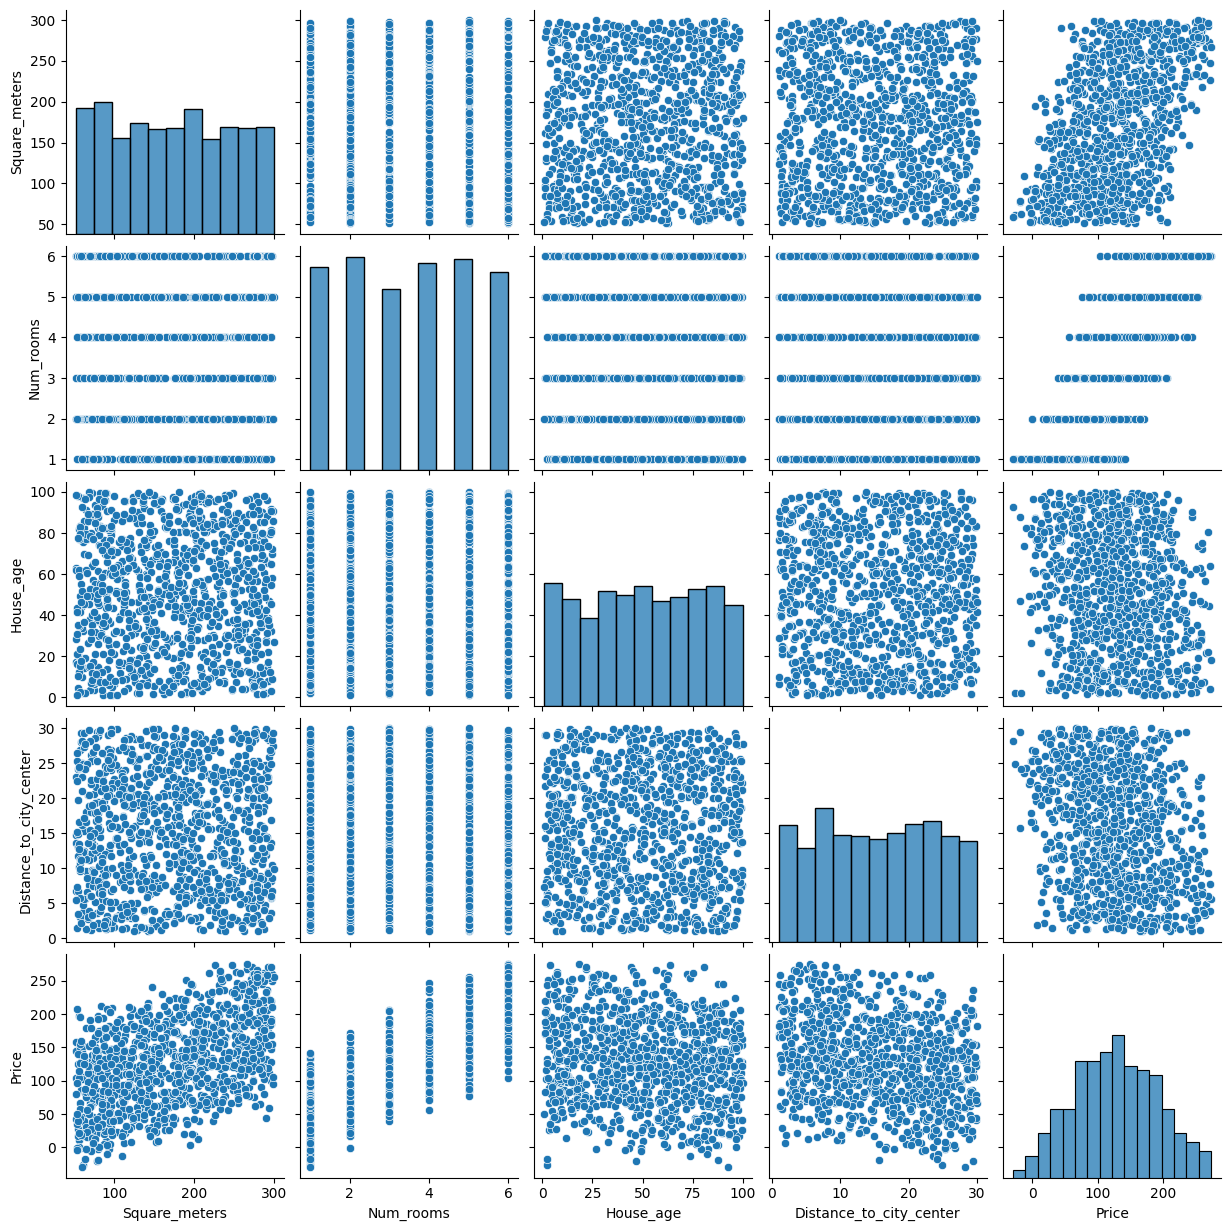

In [ ]:
import seaborn as sns

sns.pairplot(df)
plt.show()

# Разделим данные на учебные и тестовые в соотношениее 8 к 2

In [12]:
X = df[['Square_meters', 'Num_rooms', 'House_age', 'Distance_to_city_center']]
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,Square_meters,Num_rooms,House_age,Distance_to_city_center
363,186.404197,3,93.745424,20.877873
923,249.963814,5,50.805311,11.480710
734,139.707621,2,15.116820,10.433428
485,275.289503,2,47.645622,8.796752
339,74.458540,3,6.648417,9.411320
...,...,...,...,...
57,98.995716,5,6.720276,19.747304
263,179.582413,3,62.339344,24.686605
787,150.212854,4,26.674155,24.328008
247,291.663705,6,95.849275,29.219267


# Создадим модель и обучим ее

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, y_pred)
mse

209.11308015836468

In [6]:
r2 = r2_score(y_test, y_pred)
r2

0.9490274613646409

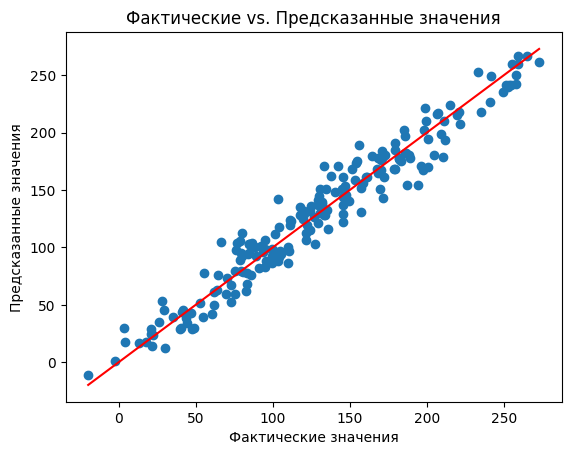

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs. Предсказанные значения")
plt.show()

In [ ]:
model.coef_

array([ 0.40503423, 29.82087429, -0.29706598, -1.93915064])

In [ ]:
model.intercept_

-1.573960082930867

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100.0)  # alpha — коэффициент регуляризации
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

211.2542456141556

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9485055397381346

# Регуляризация
Ниже в коде используется L2 регуляризация:
$$
Loss=MSE + λ\sum_{i=1}^n β_i^2
$$
В чём суть регуляризации?
по дефолту у нас стоит задача минимизации функции потерь, мы используем MSE
$$
Loss = 1/2m \sum_{i=1}^m(y_i
$$

In [ ]:
alphas = [0.01, 1.0, 100.0, 10000]
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    print(f"Alpha: {alpha}")
    print("Коэффициенты (бетта):", model.coef_)
    print("Свободный член (интерсепт):", model.intercept_)
    print("Среднеквадратичная ошибка:", mean_squared_error(y_test, y_pred))
    print("r2:",r2_score(y_test,y_pred))
    print()

Alpha: 0.01
Коэффициенты (бетта): [ 0.40419975 29.76078783 -0.29859799 -1.96162425]
Свободный член (интерсепт): -0.8078409495894476
Среднеквадратичная ошибка: 208.64008406015245
r2: 0.9491427569352108

Alpha: 1.0
Коэффициенты (бетта): [ 0.40420744 29.75072283 -0.29859115 -1.96158859]
Свободный член (интерсепт): -0.7748563985263246
Среднеквадратичная ошибка: 208.6262617021536
r2: 0.9491461262159684

Alpha: 100.0
Коэффициенты (бетта): [ 0.40495082 28.77747733 -0.29792818 -1.95805328]
Свободный член (интерсепт): 2.4132722621470037
Среднеквадратичная ошибка: 209.9902569781255
r2: 0.9488136443748024

Alpha: 10000
Коэффициенты (бетта): [ 0.42105353  6.73670145 -0.28015521 -1.69969252]
Свободный член (интерсепт): 71.85103138932126
Среднеквадратичная ошибка: 1680.6869436597249
r2: 0.5903227091066682

